In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [80]:
points = np.array([[2, 1], [2.2, 3.5], [2.7, 4], [3,5], [4, 5.3]])
n = points.shape[0]

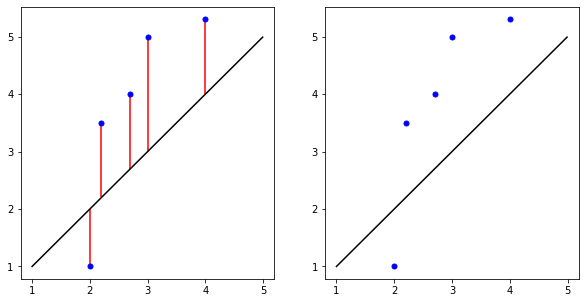

In [81]:
# Draw points and line y = x
x = np.arange(1, 5, 0.01)
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for ax in [ax1, ax2]:
    ax.plot(points[:, 0], points[:, 1], ".b", ms=10)
    ax.plot(x, x, "k")
# Draw length from each point to line either in terms of y-distance or Euclidean distance
### y-distance:
for j in range(n):    
    ys = [points[j, 0], points[j, 1]]
    ax1.vlines(x=points[j, 0], ymin=np.min(ys), ymax=np.max(ys), color="r")
### Euclidean distance:
for j in range(n):
    
plt.show()